In [ ]:
import pandas as pd

import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout




In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

In [4]:
train,test

(       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0          3     107     118     127     134     139     143     146     150   
 1          6     155     157     156     156     156     157     156     158   
 2          2     187     188     188     187     187     186     187     188   
 3          2     211     211     212     212     211     210     211     210   
 4         13     164     167     170     172     176     179     180     184   
 ...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
 27450     13     189     189     190     190     192     193     193     193   
 27451     23     151     154     157     158     160     161     163     164   
 27452     18     174     174     174     174     174     175     175     174   
 27453     17     177     181     184     185     187     189     190     191   
 27454     23     179     180     180     180     182     181     182     183   
 
        pixel9  ...  pixel

In [5]:
train_data=np.array(train,dtype="float32")
test_data=np.array(test,dtype="float32")

In [7]:
train_data,test_data

(array([[  3., 107., 118., ..., 204., 203., 202.],
        [  6., 155., 157., ..., 103., 135., 149.],
        [  2., 187., 188., ..., 195., 194., 195.],
        ...,
        [ 18., 174., 174., ..., 202., 200., 200.],
        [ 17., 177., 181., ...,  64.,  87.,  93.],
        [ 23., 179., 180., ..., 205., 209., 215.]],
       shape=(27455, 785), dtype=float32),
 array([[  6., 149., 149., ..., 112., 120., 107.],
        [  5., 126., 128., ..., 184., 182., 180.],
        [ 10.,  85.,  88., ..., 225., 224., 222.],
        ...,
        [  2., 190., 191., ..., 211., 209., 208.],
        [  4., 201., 205., ...,  67.,  70.,  63.],
        [  2., 173., 174., ..., 195., 193., 192.]],
       shape=(7172, 785), dtype=float32))

label for the image  O


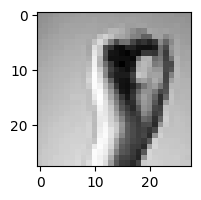

In [11]:
import matplotlib.pyplot as plt
import random
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

i=random.randint(1,train.shape[0])
fig1,ax1=plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)),cmap="gray")
print("label for the image ",class_names[int(train_data[i,0])])

<Axes: xlabel='label'>

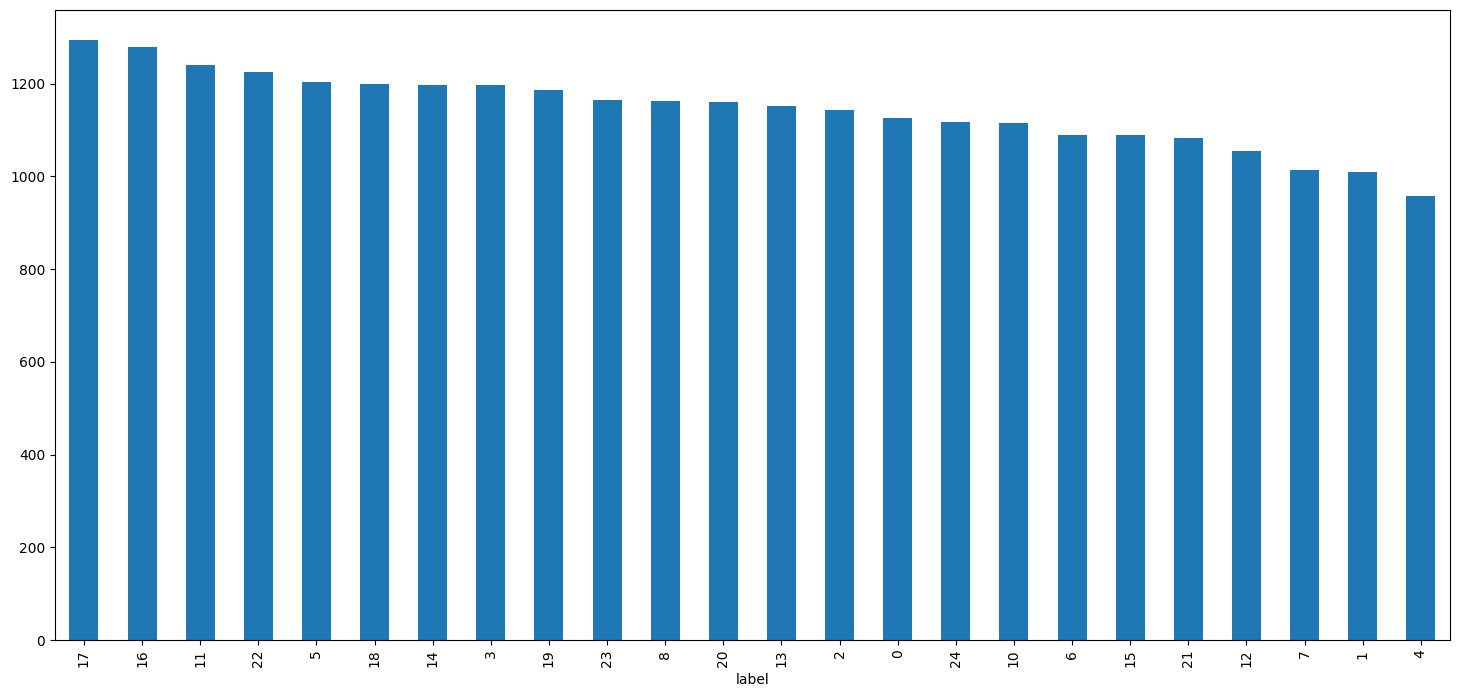

In [14]:
fig=plt.figure(figsize=(18,18))
ax1=fig.add_subplot(211)
train["label"].value_counts().plot(kind="bar",ax=ax1)


In [ ]:
x_train=train_data[:,1:] /255.
y_train=train_data[:,0]
y_train_cat=to_categorical(y_train,num_classes=25)
# y_test: Tüm satırların İLK sütunu
y_test = test_data[:, 0]
# x_test: Tüm satırların BİRİNCİDEN SONRAKİ sütunları
x_test = test_data[:, 1:] / 255.

# y_test_ca: y_test'i kategorik hale getir
y_test_cat = to_categorical(y_test, num_classes=25)

# x_test: x_test'i yeniden şekillendir
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))

#*(28, 28, 1): Geri kalan 784 pikseli 28 yükseklik, 28 genişlik ve 1 renk kanalı olacak şekilde yeniden düzenle.
#Neden 1? Çünkü bu resimler gri tonlamalıdır (grayscale). Eğer renkli (RGB) olsaydı, (28, 28, 3) olurdu

? y_train içindeki etiketler [0, 1, 2, ..., 24] gibi sayılardır. Eğer modeli bu sayılarla eğitirsek, model "B" harfinin (1) "A" harfinden (0) daha büyük veya "C" harfinin (2) "A" harfinden (0) daha büyük olduğunu zannedebilir. Bu yanlış bir matematiksel ilişkidir.

One-Hot Encoding bu sorunu çözer. Her bir etiketi, o etiketin indeksinde '1' olan, geri kalanı '0' olan bir vektöre dönüştürür.

num_classes=25: Toplam 25 farklı kategori (harf/işaret) olduğunu belirtir.

Örnek: num_classes=5 olsaydı:

2 etiketi [0, 0, 1, 0, 0] olurdu.

0 etiketi [1, 0, 0, 0, 0] olurdu.

Bu, modelin son katmanının (Softmax) her bir sınıf için bir olasılık tahmini yapmasını sağlar.

Veri Seti Neden Bu Şekilde?
Bir bilgisayar, "resim" dosyasını (JPEG, PNG vb.) doğrudan anlayamaz. Makine öğrenimi için resmi sayılara dökmemiz gerekir.

Sign Language MNIST veri seti, her biri 28x28 piksel olan gri tonlamalı resimlerden oluşur.

Resmi Düzleştirme (Flattening): 28x28 piksellik bir kareyi alırız ve onu tek, uzun bir satır haline getiririz. 28 * 28 = 784 piksel. Yani her resim, yan yana dizilmiş 784 sayıdan (piksel değerinden) oluşan bir vektördür.

Etiket Ekleme: Peki, bu 784 piksellik satırın hangi harf olduğunu (A mı, B mi, C mi?) bilgisayara nasıl söyleyeceğiz? Bunu da o satıra bir "etiket" (label) olarak ekleriz. Genellikle bu etiketi satırın en başına koyarız.

İLK SÜTUN ETİKETİMİZ BELKİ 5 C YE DENK GELİYOR KALANLAR İSE 28X28 PİKSELDEN O CYİ TAMAMLAYAN PİKSELLER

SÜTUN 1 PİKSEL 1 VB.

İlk Satır: Etiketi "5" (belki 'F' harfi). Geri kalan 784 sayı (102, 104, 106...) o 'F' harfi resminin pikselleridir.

İkinci Satır: Etiketi "0" (belki 'A' harfi). Geri kalan 784 sayı (150, 151, 153...) o 'A' harfi resminin pikselleridi

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(25, activation = 'softmax'))

model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

#history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

prediction = model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 

model.add(Flatten()) - Düzleştirme KatmanıNe Yaptı? Önceki MaxPooling2D katmanından gelen çok boyutlu (3D) özellik haritasını aldı ve onu tek boyutlu (1D) düz bir vektöre (uzun bir listeye) dönüştürdü.Neden Yaptık? Conv2D katmanları 2D/3D verilerle (resimler, özellik haritaları) çalışır. Ancak Dense (ANN) katmanları 1D verilerle (düz listeler) çalışır. Flatten, bu iki farklı dünya arasında köprü görevi görür.Örnek: Eğer son MaxPooling katmanının çıktısı (None, 3, 3, 128) şeklinde bir tensör ise (3x3 boyutunda 128 farklı özellik haritası), Flatten katmanı bunu $3 \times 3 \times 128 = 1152$ elemanlı düz bir vektöre dönüştürür.


model.add(Dense(128, activation = 'relu')) - Gizli Katman (Hidden Layer)
Ne Yaptı? Flatten katmanından gelen 1152 elemanlı listeyi girdi olarak aldı ve 128 nöronluk bir yapay sinir ağı katmanından geçirdi.

Neden 128?

Özellik Kombinasyonları: Bu 128 nöron, "Göz" kısmının bulduğu (kenarlar, eğriler, şekiller gibi) düşük seviyeli özelliklerin karmaşık kombinasyonlarını öğrenir. Örneğin, "eğer bir dikey çizgi VE bir yatay çizgi görürsem, bu 'L' harfine benzeyen bir şey olabilir" gibi ara bağlantıları öğrenir.

Boyut Azaltma: 1152 gibi çok büyük bir özellik listesini doğrudan 25 sınıfa (cevaba) bağlamak yerine, önce bilgiyi 128 nöronluk daha yoğun bir temsile sıkıştırmak (daraltmak) modelin daha iyi genelleme yapmasına yardımcı olur.

Kafa Karışıklığı Noktası (Senin Sorun): "Neden 128'e kadar arttı?" dediğin kısım aslında modelin önceki Conv2D katmanlarıydı (32 -> 64 -> 128). Bu Dense(128) katmanının nöron sayısının, son Conv2D katmanının filtre sayısıyla (128) aynı olması güzel bir tesadüf ve yaygın bir tasarım tercihidir, ancak zorunlu değildir. Burası 256 veya 64 de olabilirdi.


model.add(Dense(25, activation = 'softmax')) - Çıkış Katmanı
Ne Yaptı? Önceki 128 nöronluk gizli katmandan gelen bilgiyi aldı ve 25 nöronluk son katmana iletti.

Neden 25? Çünkü bu projede 25 farklı sınıf (muhtemelen 25 farklı işaret dili harfi) tahmin etmeye çalışıyorsun. Eğer rakamları (0-9) tanımaya çalışsaydın, burada 10 nöron olurdu.

Neden activation = 'softmax'? Bu, sınıflandırma modelleri için en önemli aktivasyon fonksiyonudur.

Bu katmandaki 25 nöronun her birine bir "olasılık" değeri atar.

Tüm bu 25 olasılığın toplamının tam olarak 1.0 (%100) olmasını garanti eder.

Sonuç: Model sana "Bu resim %85 ihtimalle 'A' harfi, %5 ihtimalle 'B' harfi, %2 ihtimalle 'C' harfi..." gibi net bir olasılık dağılımı verir. En yüksek olasılığa sahip nöron, modelin nihai tahmini olur.

Harika bir soru. Bu, CNN mimari tasarımının tam kalbinde yer alıyor.
ÇOK ÖNEMLİ
Bu sayılar (32, 64, 128) o katmandaki filtre (veya çekirdek/kernel) sayısını temsil eder.

Her bir filtre, resimde belirli bir deseni (örneğin dikey bir çizgi, bir eğri, belirli bir doku) arayan küçük bir "desen dedektörüdür".

Standart Yaklaşım: 32 -> 64 -> 128 (Huni Mimarisi)
Genellikle sayıyı artırmamızın (ve MaxPooling ile boyutu küçültmemizin) bir mantığı vardır:

İlk Katman (32 filtre): Çok basit ve genel desenleri öğrenir. (Örn: "kenarlar", "köşeler", "düz çizgiler"). 32 farklı basit desen arar.

İkinci Katman (64 filtre): Önceki katmanın bulduğu basit desenleri birleştirerek biraz daha karmaşık şekiller öğrenir. (Örn: "bir parmak ucu", "küçük bir daire", "L şekli"). 64 farklı orta karmaşıklıkta desen arar.

Üçüncü Katman (128 filtre): Orta karmaşıklıktaki desenleri birleştirerek daha da karmaşık ve anlamsal özellikler öğrenir. (Örn: "bükülmüş bir el", "kapalı bir yumruk"). 128 farklı karmaşık desen arar.

Bu, bilginin "geniş ve sığ" (yüksek çözünürlük, az özellik) durumdan "dar ve derin" (düşük çözünürlük, çok özellik) duruma geçtiği bir huni (funnel) gibidir. Flatten katmanına gelindiğinde elimizde resmin ne olduğu hakkında çok yoğun, zengin bir özellik seti (128 farklı özellik haritası) olur.

Senin Önerin: 32 -> 64 -> 128 -> 64 (Darboğaz Mimarisi)
Peki ya 128'den sonra tekrar 64'e düşersek ne olur?

Buna mimaride "darboğaz" (bottleneck) katmanı denir.

Anlamı Şudur:

Model, 3. katmanda 128 farklı karmaşık özellik (desen) öğrenir. Ancak bir sonraki katmanda ona diyorsun ki: "Bu 128 özelliği al ve onları sadece 64 özellik kullanarak yeniden özetle. Bilgiyi sıkıştır."

Ne Olurdu? (Olası Sonuçlar):

Bilgi Kaybı (Kötü İhtimal): Model, 128 katmanında öğrendiği çok önemli ve ayırt edici bazı özellikleri, 64'e sıkıştırmaya çalışırken kaybedebilir. Bu, nihai doğruluğun (accuracy) düşmesine neden olabilir.

Daha Verimli Temsil (İyi İhtimal): Belki de o 128 özelliğin bir kısmı gereksizdi veya birbirine çok benziyordu (redundant). Bu -> 64'lük katman, modeli bu 128 özellik arasından en önemli olanları seçip birleştirmeye zorlar. Bu, daha verimli bir temsil öğrenmesini sağlar ve aşırı öğrenmeyi (overfitting) azaltabilir.

Daha Küçük Model: Modelin o katmanındaki parametre sayısı azalır, bu da modeli biraz daha küçük ve hızlı hale getirebilir.

Özetle:

32 -> 64 -> 128: Özellik zenginliğini sürekli artıran agresif bir öğrenme stratejisi.

32 -> 64 -> 128 -> 64: Zirveye ulaştıktan sonra "Dur ve bilgiyi özetle" diyen daha muhafazakar bir strateji.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os # Eklendi

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

import mlflow  # MLFLOW EKLENTİSİ
import mlflow.keras  # MLFLOW EKLENTİSİ
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns 

print("Kütüphaneler yüklendi.")

# --- 1. Veri Yükleme ve İşleme ---

try:
    train = pd.read_csv('data/sign_mnist_train.csv')
    test = pd.read_csv('data/sign_mnist_test.csv')
    print("Veri setleri 'data/' klasöründen okundu.")
except FileNotFoundError:
    print("HATA: 'data/sign_mnist_train.csv' veya 'data/sign_mnist_test.csv' bulunamadı.")
    print("Lütfen DVC ile veriyi çektiğinizden emin olun (dvc pull)")
    exit()


#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

#Define class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

print("Veri ön işleme tamamlandı.")

# --- 2. MLflow Deney Başlangıcı ---

# Hiper-parametreler
BATCH_SIZE = 128
EPOCHS = 10
DROPOUT_RATE = 0.2
os.environ["MLFLOW_TRACKİNG_URL"]='https://dagshub.com/mericsimsek344/dlsignmnistwithdvc.mlflow'
os.environ['MLFLOW_TRACKING_USERNAME'] = 'mericsimsek344'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '90eb5cda0404ab9a05fd674d26e57d372858e1c6' # <-- TOKEN'INI BURAYA GİR

# MLflow deneyi ayarla
mlflow.set_experiment("Sign_Language_Classifier")

print("MLflow deneyi başlatılıyor...")

with mlflow.start_run() as run:
    run_id = run.info.run_id
    print(f"MLflow Run ID: {run_id}")

    # Parametreleri logla
    mlflow.log_param("epochs", EPOCHS)
    mlflow.log_param("batch_size", BATCH_SIZE)
    mlflow.log_param("dropout", DROPOUT_RATE)
    mlflow.log_param("optimizer", "adam")
    
    # Keras (veya tf.keras) için otomatik loglamayı etkinleştir
    # Bu, modeli, metrikleri (loss, acc) ve parametreleri otomatik loglar.
    mlflow.keras.autolog() 
    
    # --- 3. Model Oluşturma ve Eğitim ---
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(DROPOUT_RATE))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(DROPOUT_RATE))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(DROPOUT_RATE))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(25, activation = 'softmax'))

    model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
    
    print("Model eğitimi başlıyor...")
    
    history = model.fit(X_train, y_train_cat, 
                        batch_size = BATCH_SIZE, 
                        epochs = EPOCHS, 
                        verbose = 1, 
                        validation_data = (X_test, y_test_cat))

    print("Model eğitimi tamamlandı.")
    
    # --- 4. Manuel Loglama (Grafikler ve Ekstra Metrikler) ---
    # Not: autolog() zaten loss/acc logladı ama biz yine de yapalım
    
    print("Grafikler oluşturuluyor ve artifact olarak loglanıyor...")
    
    # Loss grafiği
    plt.figure()
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig("loss_plot.png")
    mlflow.log_artifact("loss_plot.png")
    plt.close()

    # Accuracy grafiği
    plt.figure()
    plt.plot(history.history['acc'], label='Training acc')
    plt.plot(history.history['val_acc'], label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.savefig("accuracy_plot.png")
    mlflow.log_artifact("accuracy_plot.png")
    plt.close()

    # Final Test Accuracy (Sklearn ile)
    # DÜZELTME: model.predict_classes() kaldırıldı
    predictions_prob = model.predict(X_test)
    prediction = np.argmax(predictions_prob, axis=1) # Olasılıklardan en yüksek indeksi al

    accuracy = accuracy_score(y_test, prediction)
    print(f'Final Test Accuracy Score = {accuracy:.4f}')
    
    # Bu önemli metriği manuel logla
    mlflow.log_metric("final_test_accuracy", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test, prediction)
    fig, ax = plt.subplots(figsize=(14, 14))
    sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, fmt='d', 
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

print(f"\nMLflow deneyi tamamlandı.")
print(f"Arayüzü görmek için terminalde 'mlflow ui' çalıştırın ve http://127.0.0.1:5000 adresine gidin.")

Kütüphaneler yüklendi.
Veri setleri 'data/' klasöründen okundu.
Veri ön işleme tamamlandı.
MLflow deneyi başlatılıyor...
MLflow Run ID: 6f4794de3cf84f2abe2c7687d9b17a3c


c:\Users\meric\Desktop\project2withmlops\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model eğitimi başlıyor...


Epoch 1/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - acc: 0.2098 - loss: 2.5624 - val_acc: 0.4837 - val_loss: 1.5911
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - acc: 0.6512 - loss: 1.0507 - val_acc: 0.7461 - val_loss: 0.7179
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - acc: 0.8034 - loss: 0.5793 - val_acc: 0.8489 - val_loss: 0.4460
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - acc: 0.8752 - loss: 0.3687 - val_acc: 0.8848 - val_loss: 0.3550
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - acc: 0.9147 - loss: 0.2591 - val_acc: 0.8910 - val_loss: 0.3228
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - acc: 0.9403 - loss: 0.1845 - val_acc: 0.9112 - val_loss: 0.2531
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - acc: 0.9529 - loss: 0.1424 - val_acc: 0.9221 - val_loss: 0.2261
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - acc: 0.9635 - loss: 0.1159 - val_acc: 0.9387 - val_loss: 0.2094
Epoch 9/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1

2025/10/25 12:48:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Model eğitimi tamamlandı.
Grafikler oluşturuluyor ve artifact olarak loglanıyor...
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Final Test Accuracy Score = 0.9477

MLflow deneyi tamamlandı.
Arayüzü görmek için terminalde 'mlflow ui' çalıştırın ve http://127.0.0.1:5000 adresine gidin.


Elbette. Aktivasyon fonksiyonunun temel görevini (doğrusal olmama) anlatan en sevdiğim örneklerden biri:

Somut Örnek: "Gitar Efekt Pedalı" (Distortion Pedalı)
Bir yapay sinir ağı katmanının (nöronun) yaptığı "çarpma ve toplama" işlemini, bir elektro gitaristten gelen temiz sinyal olarak düşünün.

Girdi (Temiz Sinyal) = (Notalar * 1.5) + (Gürültü * 0.1)

Bu sinyal temizdir, pürüzsüzdür ve doğrusaldır. Sinyali iki kat artırırsanız, ses de iki kat yüksek çıkar. Tıpkı aktivasyon fonksiyonu olmayan bir katman gibi.

Şimdi, bu temiz sinyali bir Distortion (Bozulma) Efekt Pedalı'na (yani Aktivasyon Fonksiyonuna) gönderiyoruz.

Pedalın (Aktivasyon Fonksiyonunun) Kuralı Nedir?
Bu pedalın basit bir kuralı vardır (Tıpkı ReLU'nun max(0, x) kuralı gibi): "Bana gelen sinyalin gücü 5'in altındaysa, onu biraz kıs. Ama eğer sinyal 5'in üzerindeyse, sinyali kırp (clip), karesini al ve vahşice boz!"

Sonuç (Çıktı)
Düşük Notalar (Girdi < 5): Gitarist yavaşça bir notaya dokunur. Sinyal 3 olarak gelir. Pedal bunu 2'ye düşürür. Ses temiz kalır.

Yüksek Notalar (Girdi > 5): Gitarist tele sertçe vurur (power chord). Sinyal 8 olarak gelir.

Pedal (Aktivasyon Fonksiyonu) Devreye Girer: Sinyali alır, 8'i 5'te kırpar (clipping), üstüne harmonikler ekler ve tamamen bozar.

Çıktı: Artık 8 değildir. Tamamen farklı bir şekle sahip, "vızıltılı" (fuzzy), agresif bir ROCK tonu haline gelmiştir (zzzzzzzt!).

Anlamı Nedir?
Doğrusal Olmama: Çıktı, girdinin basit bir çarpımı değildir. (Sinyal * 2) değildir. Sinyalin niteliği değişmiştir. Temiz bir sinüs dalgası, kare bir dalgaya dönüşmüştür.

Karar Verme: Pedal, bir "karar" vermiştir. "Sinyal 5'in altında mı, üstünde mi? Altındaysa A yap, üstündeyse B yap."

Karmaşıklık: Bu basit kural (5'in üstündeyse boz), sese inanılmaz bir karmaşıklık ve zenginlik katmıştır.

Yapay Sinir Ağına Bağlantısı:

Aktivasyon fonksiyonu olmadan, ağınız sadece "temiz" sinyaller üretebilir (düz çizgiler). Bu, sadece çok basit problemleri çözebilir.

Aktivasyon fonksiyonları (Distortion Pedalları), her katmanda sinyali "bozarak", "bükerek" ve "dönüştürerek", ağın inanılmaz derecede karmaşık desenleri (rock müzik gibi) öğrenmesini sağlar. Her katman, bir öncekinin "bozduğu" sinyali alıp bir daha bozar, ta ki "C" harfini veya bir köpeği tanıyacak kadar karmaşık bir desen oluşana kadar.